

<h1 align=center><font size = 5>Projet d'analyse et de classification des clients dans un supermarché en fonction de leur fréquence et de leurs achats</font></h1>

## Table des matières
<ol>
<li><a href="#desc">Description du projet</a></li>
<li><a href="#desc">clustering</a></li>
    <li><a href="#collecte">Methode K-Means</a></li>
    <li><a href="#preparation">Méthode K-Medoids</a></li>
    <li><a href="#analyse">Méthode basée sur la densité</a></li>
    <li><a href="#visualisation">méthodes basées sur une grille</a></li>
<li><a href="#desc">Analyse Formelle de Concepts</a></li>
<li><a href="#desc">Comparaison entre clustering et AFC</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ol>

# Définition

>Le clustering (ou regroupement en français) est une technique d'apprentissage automatique non supervisé utilisée pour regrouper un ensemble d'objets de telle sorte que les objets dans le même groupe (appelé cluster) sont plus similaires les uns aux autres qu'à ceux des autres groupes.

# Description du projet

L'objectif du projet est d'analyser les données des clients, les classifier en fonction de leur fréquence et de leurs achats ou dépenses dans le supermarché afin de determiner un meilleur plan pour les opérations de marketing.

Les étapes suivantes constituent la démarche à suivre:
> La collecte de données: le dataset est disponible sur kaggle via l'url https://www.kaggle.com/datasets/krishnaraj30/mall-visiting-customer-data/data

> La préparation des données (nettoyage des données)

> Application des algorithmes de clustering sur le dataset(k-means, k-medoids)

> Application de l'Analyse Formelle des Concepts (AFC) sur le dataset

> Visualisation des resultats

> Proposition d'idées sur le plan marketing à mettre en place en fonction des resultats obtenus

# Application pratique

> Segmentation de Marché : Utilisez les clusters pour segmenter votre marché en groupes distincts de clients, ce qui peut guider des stratégies marketing ciblées.

>Personnalisation : Personnalisez vos offres, services ou communications en fonction des besoins et des caractéristiques des différents clusters.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

sns.set()



In [4]:
from sklearn import preprocessing

In [5]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Methode par partitionnement 

### K-Means

### Idée de la methode 
Au terme de cette analyse il est question de voir:

1- Comment réaliser la segmentation client à l'aide de l'algorithme de clustering(K-Means)

2- Qui sont les clients cibles avec lesquels le supermarché peut démarrer une stratégie marketing.

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.duplicated().sum()

0

In [10]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

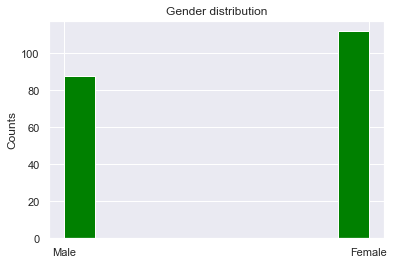

In [12]:
plt.hist(data['Gender'], color='green')
plt.ylabel('Counts')
plt.title('Gender distribution')
plt.show()

In [13]:
y=data['Spending Score (1-100)']
x=data['Annual Income (k$)']

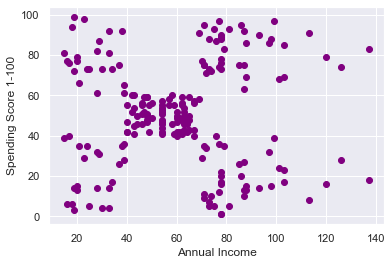

In [14]:
plt.scatter(x,y, color='purple')
plt.ylabel('Spending Score 1-100')
plt.xlabel('Annual Income')
plt.show()

Text(0, 0.5, 'Spending Score')

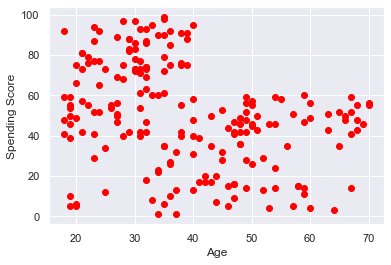

In [15]:
plt.scatter(data['Age'], data['Spending Score (1-100)'], color='Red')
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [16]:
x=data[['Spending Score (1-100)','Annual Income (k$)']]

In [17]:
x.copy()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17
...,...,...
195,79,120
196,28,126
197,74,126
198,18,137


In [18]:
##### standardisation
x_scale= preprocessing.scale(x)
x_scale

array([[-0.43480148, -1.73899919],
       [ 1.19570407, -1.73899919],
       [-1.71591298, -1.70082976],
       [ 1.04041783, -1.70082976],
       [-0.39597992, -1.66266033],
       [ 1.00159627, -1.66266033],
       [-1.71591298, -1.62449091],
       [ 1.70038436, -1.62449091],
       [-1.83237767, -1.58632148],
       [ 0.84631002, -1.58632148],
       [-1.4053405 , -1.58632148],
       [ 1.89449216, -1.58632148],
       [-1.36651894, -1.54815205],
       [ 1.04041783, -1.54815205],
       [-1.44416206, -1.54815205],
       [ 1.11806095, -1.54815205],
       [-0.59008772, -1.50998262],
       [ 0.61338066, -1.50998262],
       [-0.82301709, -1.43364376],
       [ 1.8556706 , -1.43364376],
       [-0.59008772, -1.39547433],
       [ 0.88513158, -1.39547433],
       [-1.75473454, -1.3573049 ],
       [ 0.88513158, -1.3573049 ],
       [-1.4053405 , -1.24279661],
       [ 1.23452563, -1.24279661],
       [-0.7065524 , -1.24279661],
       [ 0.41927286, -1.24279661],
       [-0.74537397,

In [46]:
x_scale.shape

(200, 2)

In [53]:
## Within-Cluster Sum of Squares
wcss=[]

for i in range (1,10):
    kmeans= KMeans(i)
    kmeans.fit(x_scale)
    wcss.append(kmeans.inertia_)

wcss

C:\Users\thier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[400.0,
 270.89235946739046,
 157.70400815035947,
 122.89391687381251,
 65.56840815571681,
 55.37581558455638,
 44.91118554999014,
 37.18175782682131,
 33.94409477859161]

>Le but de ce code est de générer une liste de valeurs WCSS pour différentes valeurs de k, ce qui peut vous aider à décider du nombre optimal de clusters pour votre tâche de clustering K-Means. En règle générale, vous traceriez ces valeurs WCSS par rapport aux valeurs correspondantes de k et recherchez un « point de coude » dans le tracé. Le point du coude est l'endroit où > le taux de diminution du WCSS ralentit, indiquant un nombre potentiellement optimal de clusters.

Text(0, 0.5, 'WCSS')

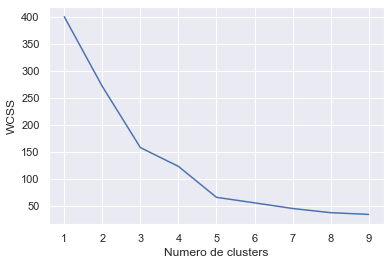

In [54]:
plt.plot(range(1,10),wcss)
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')

Acording the plot, we can to try with 3 or 5 clusters 

In [40]:
modelo=KMeans(5)
modelo.fit(x_scale)
clusters=x.copy()
clusters['cluster_pred']=modelo.fit_predict(x_scale)
clusters

C:\Users\thier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Spending Score (1-100),Annual Income (k$),cluster_pred
0,39,15,4
1,81,15,3
2,6,16,4
3,77,16,3
4,40,17,4
...,...,...,...
195,79,120,1
196,28,126,0
197,74,126,1
198,18,137,0


Text(0, 0.5, 'Spending Score')

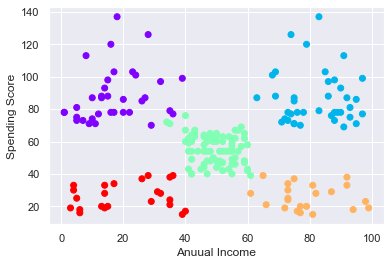

In [41]:
plt.scatter(clusters['Spending Score (1-100)'], clusters['Annual Income (k$)'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Anuual Income')
plt.ylabel('Spending Score')

# Strategie en fonction des groupes de clients

>Cluster 1 : Clients à revenu élevé avec des scores de dépenses élevés. Stratégie : Offrir des produits de luxe et des services premium.

>Cluster 2 : Clients à revenu faible avec des scores de dépenses faibles. Stratégie : Offrir des produits à bas prix et des promotions.

>Cluster 3 : Clients à revenu moyen avec des scores de dépenses variables. Stratégie : Offrir une gamme de produits et des programmes de fidélité.

>Cluster 4 : Clients à revenu élevé avec des scores de dépenses faibles. Stratégie : Encourager plus de dépenses par des offres et des services exclusifs.

>Cluster 5 : Clients à revenu faible avec des scores de dépenses élevés. Stratégie : Étudier les comportements de dépenses pour cibler les produits et les services.

In [84]:
X=data[['Spending Score (1-100)','Age']]
X

,Spending Score (1-100),Age
0,39,19
1,81,21
2,6,20
3,77,23
4,40,31
...,...,...
195,79,35
196,28,45
197,74,32
198,18,32


In [85]:
X.copy()

,Spending Score (1-100),Age
0,39,19
1,81,21
2,6,20
3,77,23
4,40,31
...,...,...
195,79,35
196,28,45
197,74,32
198,18,32


In [86]:
scale_X=preprocessing.scale(X)
scale_X

array([[-0.43480148, -1.42456879],
       [ 1.19570407, -1.28103541],
       [-1.71591298, -1.3528021 ],
       [ 1.04041783, -1.13750203],
       [-0.39597992, -0.56336851],
       [ 1.00159627, -1.20926872],
       [-1.71591298, -0.27630176],
       [ 1.70038436, -1.13750203],
       [-1.83237767,  1.80493225],
       [ 0.84631002, -0.6351352 ],
       [-1.4053405 ,  2.02023231],
       [ 1.89449216, -0.27630176],
       [-1.36651894,  1.37433211],
       [ 1.04041783, -1.06573534],
       [-1.44416206, -0.13276838],
       [ 1.11806095, -1.20926872],
       [-0.59008772, -0.27630176],
       [ 0.61338066, -1.3528021 ],
       [-0.82301709,  0.94373197],
       [ 1.8556706 , -0.27630176],
       [-0.59008772, -0.27630176],
       [ 0.88513158, -0.99396865],
       [-1.75473454,  0.51313183],
       [ 0.88513158, -0.56336851],
       [-1.4053405 ,  1.08726535],
       [ 1.23452563, -0.70690189],
       [-0.7065524 ,  0.44136514],
       [ 0.41927286, -0.27630176],
       [-0.74537397,

In [87]:
#### Within-Cluster Sum of Squares
wcss=[]

for i in range (1,10):
    kmeans= KMeans(i)
    kmeans.fit(scale_X)
    wcss.append(kmeans.inertia_)

wcss

C:\Users\thier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[400.0,
 189.38749033992428,
 124.33553836009895,
 89.93185916742928,
 71.67031622610222,
 66.3559659216038,
 47.87276585180487,
 39.64930040345398,
 35.04492181209986]

Text(0.5, 0, 'Number of clusters')

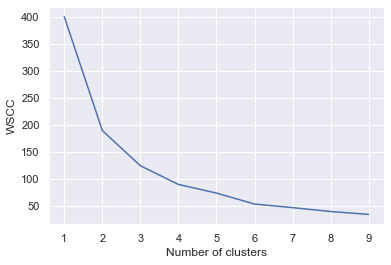

In [34]:
plt.plot(range(1,10), wcss)
plt.ylabel('WSCC')
plt.xlabel('Number of clusters')

il y'a environ 3 ou 4 cluster d'après le graphique

In [90]:
modelo=KMeans(3)
modelo.fit(scale_X)
clusters=X.copy()
clusters['cluster_pred']=modelo.fit_predict(scale_X)
clusters

C:\Users\thier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Spending Score (1-100),Age,cluster_pred
0,39,19,2
1,81,21,1
2,6,20,2
3,77,23,1
4,40,31,2
...,...,...,...
195,79,35,1
196,28,45,2
197,74,32,1
198,18,32,2


Text(0, 0.5, 'Spending Score')

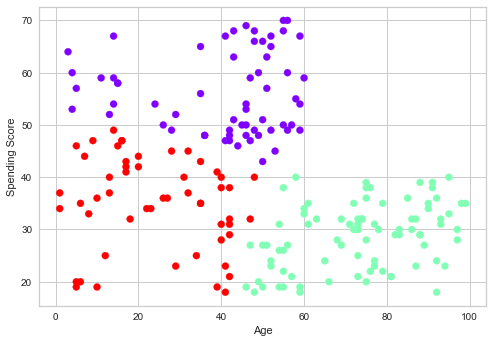

In [91]:
plt.scatter(clusters['Spending Score (1-100)'], clusters['Age'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score')

> Considérant que la majorité des clients sont des femmes, la stratégie marketing pourrait se concentrer sur elles, de plus le modèle kMean indique qu'elles ont moins de 60 ans


## K-Medoids

In [117]:
Y=data

In [118]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Y['Gender'] = le.fit_transform(Y['Gender'])

In [119]:
Y.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2


In [120]:
cols = Y.columns

In [121]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

Y = ms.fit_transform(Y)

In [122]:
Y = pd.DataFrame(Y, columns=[cols])

In [123]:
Y.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,1.0,0.019231,0.000000,0.387755,0.333333
1,0.005025,1.0,0.057692,0.000000,0.816327,0.333333
2,0.010050,0.0,0.038462,0.008197,0.051020,0.666667
3,0.015075,0.0,0.096154,0.008197,0.775510,0.666667
4,0.020101,0.0,0.250000,0.016393,0.397959,0.666667


In [124]:
from sklearn_extra.cluster import KMedoids  
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

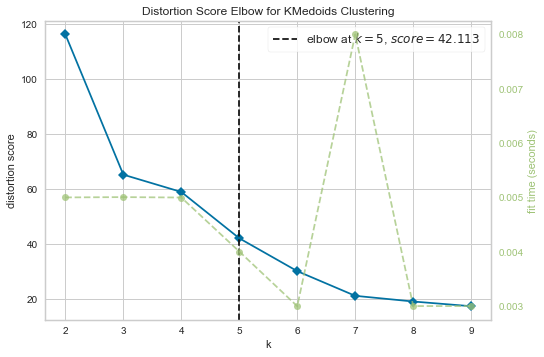

<AxesSubplot:title={'center':'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [136]:
km=KMedoids()
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(Y)
visualizer.show()

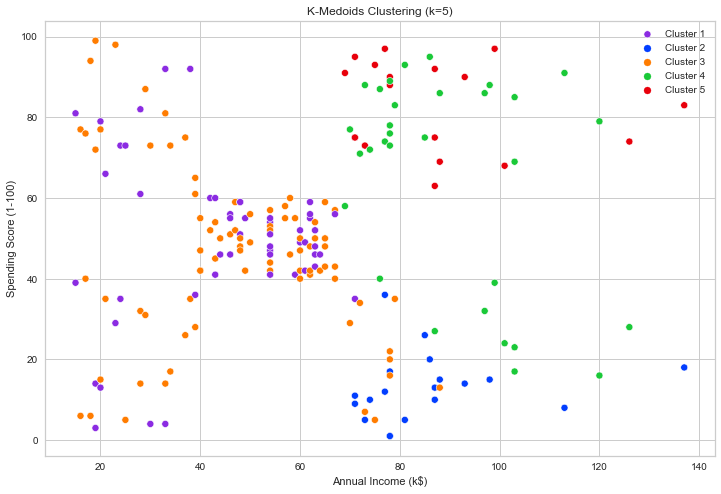

In [139]:
k = 5
legend_labels = [f'Cluster {i+1}' for i in range(k)]
kmedoids = KMedoids(n_clusters=k,init='random')
data['Cluster'] = kmedoids.fit_predict(Y)
plt.figure(figsize=(12,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='bright', s=50)
plt.title(f'K-Medoids Clustering (k={k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(legend_labels)

plt.show()

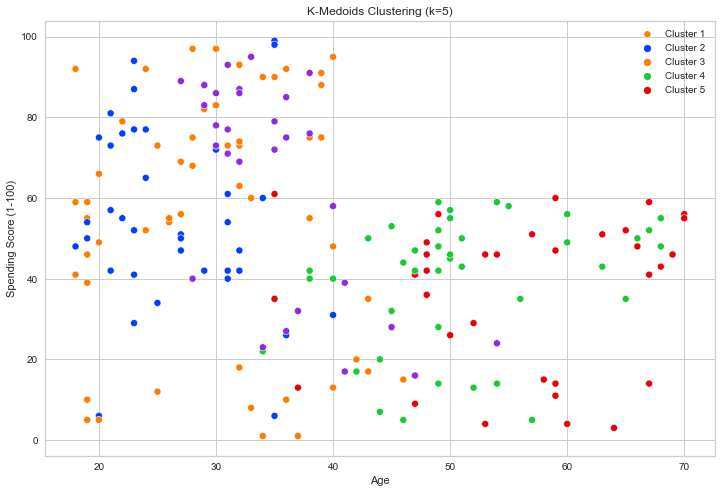

In [142]:
k = 5
legend_labels = [f'Cluster {i+1}' for i in range(k)]
kmedoids = KMedoids(n_clusters=k,init='random')
data['Cluster'] = kmedoids.fit_predict(Y)
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data, palette='bright', s=50)
plt.title(f'K-Medoids Clustering (k={k})')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(legend_labels)

plt.show()

## k-Means vs k-Medoïds
> K-Means Utilise les centroids, qui sont les moyennes arithmétiques des points dans chaque cluster.Les centroids ne sont pas nécessairement des points réels du jeu de données. Tandis que K-Medoid utilise les medoids, qui sont des points réels du jeu de données. Le medoid d'un cluster est le point dont la distance moyenne à tous les autres points du cluster est minimale

>KMeans est Utilisé couramment pour des applications où la vitesse est critique et où les données sont relativement propres, comme la segmentation de marché, le regroupement de documents, et la compression d'images.
KMedoids :
Préféré dans des scénarios où la robustesse aux outliers est essentielle et où il est crucial que les clusters soient représentés par des points réels, comme dans la médecine, la bioinformatique, et les analyses de réseaux sociaux

# Méthode par densité

>Le clustering par densité est une méthode de regroupement qui identifie des clusters comme des régions de haute densité de points séparées par des régions de basse densité. L'un des algorithmes les plus populaires pour le clustering par densité est DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Elle repose sur deux paramètres:
>ε (epsilon) : Le rayon maximal de la zone de voisinage autour d'un point.

>minPts : Le nombre minimum de points nécessaires pour former un cluster

In [143]:
from sklearn.cluster import DBSCAN
from sklearn.impute import KNNImputer

In [144]:
from sklearn.preprocessing import StandardScaler

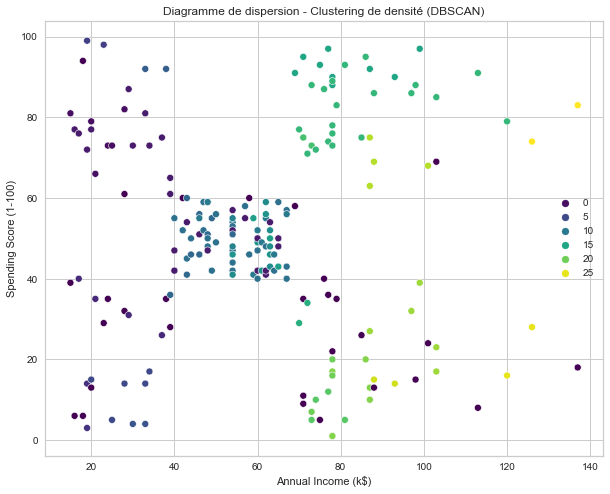

In [155]:
Z = data

# Imputation des valeurs manquantes avec KNNImputer
imputer = KNNImputer(n_neighbors=5)
Z = imputer.fit_transform(Z)
Z = pd.DataFrame(Z, columns=data.columns)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Z)

# Clustering de densité (DBSCAN)
dbscan = DBSCAN(eps=0.6, min_samples=2)
labels = dbscan.fit_predict(X_scaled)

# Visualiser les résultats
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue=labels, palette='viridis')
plt.title('Diagramme de dispersion - Clustering de densité (DBSCAN)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [60]:
Z = linkage(X, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,48.0,49.0,2.236068,2.0
1,129.0,131.0,2.236068,2.0
2,114.0,115.0,2.449490,2.0
3,3.0,5.0,2.645751,2.0
4,65.0,68.0,3.162278,2.0
...,...,...,...,...
194,387.0,389.0,258.508670,50.0
195,385.0,394.0,293.443168,71.0
196,392.0,393.0,396.900810,76.0
197,391.0,395.0,513.014529,124.0


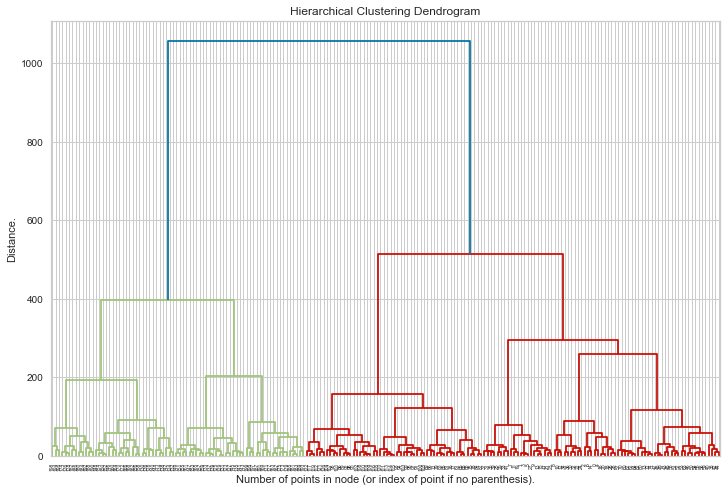

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

# Analyse Formelle de Concepts  (AFC)

In [156]:
from sklearn.preprocessing import KBinsDiscretizer
import concepts
import networkx as nx

In [172]:
df1 = pd.read_csv('Mall_Customers.csv')

In [173]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Préparation des données

la préparation des données ici consiste à discretiser les colonnes numériques. ceci constitue une étape courante dans l'Analyse Formelle des Concepts (AFC) pour les raisons suivantes :

>Transformation en attributs binaires : L'AFC fonctionne principalement avec des données binaires, où chaque attribut est présent ou absent. En discrétisant les colonnes numériques, nous transformons les valeurs continues en valeurs discrètes que nous pouvons ensuite représenter sous forme binaire.

>Simplification et interprétation : Les valeurs discrètes sont souvent plus faciles à interpréter dans le contexte de l'AFC. Par exemple, au lieu d'avoir une plage continue de revenus annuels, nous pouvons avoir des catégories comme "faible", "moyen", et "élevé".

>Identification de groupes significatifs : La discrétisation permet de regrouper des valeurs similaires ensemble, ce qui peut aider à identifier des groupes ou des concepts qui partagent des attributs communs. Cela rend les relations entre les objets et les attributs plus claires.

In [175]:
# Convertir Gender en données binaires
df1['Gender'] = df1['Gender'].map({'Male': 0, 'Female': 1})

# Discrétiser Age, Annual Income, et Spending Score en valeurs categorielles 
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = discretizer.fit_transform(
    df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)


C:\Users\thier\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [176]:
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,0.0,0.0,1.0
1,2,0,0.0,0.0,2.0
2,3,1,0.0,0.0,0.0
3,4,1,0.0,0.0,2.0
4,5,1,0.0,0.0,1.0
...,...,...,...,...,...
195,196,1,0.0,2.0,2.0
196,197,1,1.0,2.0,0.0
197,198,0,0.0,2.0,2.0
198,199,0,0.0,2.0,0.0


pour chaque colonne, nous avons 3 groupes: 
> 1 pour Bas
>2 pour moyen
>3 pour élévé

## Transformation des données en binaire

>Transformation en attributs binaires : Chaque ligne du DataFrame est transformée en un dictionnaire où chaque valeur discrétisée devient un attribut binaire. Par exemple, une valeur de Age de 0 devient Age_0.

In [177]:
# Convertir en format binaire pour chaque attribut discrétisé
context_data = []
for index, row in df1.iterrows():
    context_data.append({
        'CustomerID': row['CustomerID'],
        'Gender': f"Gender_{int(row['Gender'])}",
        'Age': f"Age_{int(row['Age'])}",
        'Income': f"Income_{int(row['Annual Income (k$)'])}",
        'Spending': f"Spending_{int(row['Spending Score (1-100)'])}"
    })


In [178]:
print(context_data)

[{'CustomerID': 1.0, 'Gender': 'Gender_0', 'Age': 'Age_0', 'Income': 'Income_0', 'Spending': 'Spending_1'}, {'CustomerID': 2.0, 'Gender': 'Gender_0', 'Age': 'Age_0', 'Income': 'Income_0', 'Spending': 'Spending_2'}, {'CustomerID': 3.0, 'Gender': 'Gender_1', 'Age': 'Age_0', 'Income': 'Income_0', 'Spending': 'Spending_0'}, {'CustomerID': 4.0, 'Gender': 'Gender_1', 'Age': 'Age_0', 'Income': 'Income_0', 'Spending': 'Spending_2'}, {'CustomerID': 5.0, 'Gender': 'Gender_1', 'Age': 'Age_0', 'Income': 'Income_0', 'Spending': 'Spending_1'}, {'CustomerID': 6.0, 'Gender': 'Gender_1', 'Age': 'Age_0', 'Income': 'Income_0', 'Spending': 'Spending_2'}, {'CustomerID': 7.0, 'Gender': 'Gender_1', 'Age': 'Age_0', 'Income': 'Income_0', 'Spending': 'Spending_0'}, {'CustomerID': 8.0, 'Gender': 'Gender_1', 'Age': 'Age_0', 'Income': 'Income_0', 'Spending': 'Spending_2'}, {'CustomerID': 9.0, 'Gender': 'Gender_0', 'Age': 'Age_2', 'Income': 'Income_0', 'Spending': 'Spending_0'}, {'CustomerID': 10.0, 'Gender': 'Gend

## Création et sauvegarde du tableau contextuel

In [182]:
# Créer un tableau contextuel
context_lines = [
    "CustomerID,Gender_0,Gender_1,Age_0,Age_1,Age_2,Income_0,Income_1,Income_2,Spending_0,Spending_1,Spending_2"
]
for row in context_data:
    line = ",".join([
        str(row['CustomerID']) if attr == 'CustomerID' else 
        '1' if attr in row.values() else '0' for attr in [
            'CustomerID', 'Gender_0', 'Gender_1', 'Age_0', 'Age_1', 'Age_2', 
            'Income_0', 'Income_1', 'Income_2', 'Spending_0', 'Spending_1', 'Spending_2'
        ]
    ])
    context_lines.append(line)

# Sauvegarder le contexte dans un fichier CSV
context_str = "\n".join(context_lines)
with open('context.csv', 'w') as f:
    f.write(context_str)

In [185]:
tableau = pd.read_csv('context.csv')
tableau

,CustomerID,Gender_0,Gender_1,Age_0,Age_1,Age_2,Income_0,Income_1,Income_2,Spending_0,Spending_1,Spending_2
0,1.0,1,0,1,0,0,1,0,0,0,1,0
1,2.0,1,0,1,0,0,1,0,0,0,0,1
2,3.0,0,1,1,0,0,1,0,0,1,0,0
3,4.0,0,1,1,0,0,1,0,0,0,0,1
4,5.0,0,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196.0,0,1,1,0,0,0,0,1,0,0,1
196,197.0,0,1,0,1,0,0,0,1,1,0,0
197,198.0,1,0,1,0,0,0,0,1,0,0,1
198,199.0,1,0,1,0,0,0,0,1,1,0,0


Création du tableau contextuel : Le tableau contextuel est créé en utilisant des lignes de texte où chaque ligne représente une instance avec des valeurs binaires pour les attributs.
Sauvegarde dans un fichier CSV : Le tableau contextuel est sauvegardé dans un fichier context.csv.

## Lecture du contexte formel et création du contexte

In [181]:
# Lire le contexte formel manuellement avec pandas
context_df = pd.read_csv('context.csv')

# Vérifiez le contenu du fichier CSV
print(context_df.head())

# Extraire les objets, propriétés et le tableau booléen
objects = context_df['CustomerID'].astype(str).tolist()
properties = context_df.columns[1:].tolist()
bools = context_df.iloc[:, 1:].astype(bool).values.tolist()

# Créer le contexte formel
context = concepts.Context(objects, properties, bools)

   CustomerID  Gender_0  Gender_1  Age_0  Age_1  Age_2  Income_0  Income_1  \
0         1.0         1         0      1      0      0         1         0   
1         2.0         1         0      1      0      0         1         0   
2         3.0         0         1      1      0      0         1         0   
3         4.0         0         1      1      0      0         1         0   
4         5.0         0         1      1      0      0         1         0   

   Income_2  Spending_0  Spending_1  Spending_2  
0         0           0           1           0  
1         0           0           0           1  
2         0           1           0           0  
3         0           0           0           1  
4         0           0           1           0  


Lecture du fichier CSV : Le fichier CSV est lu dans un DataFrame context_df.
Extraction des objets, propriétés et booléens : Les objets (identifiants des clients), les propriétés (attributs binaires), et les valeurs booléennes (0 ou 1) sont extraits du DataFrame.
Création du contexte formel : Un contexte formel est créé à partir des objets, propriétés et valeurs booléennes.

# Filtrage et visualisation du treillis de concepts

In [187]:
# Extraire les concepts formels
lattice = context.lattice

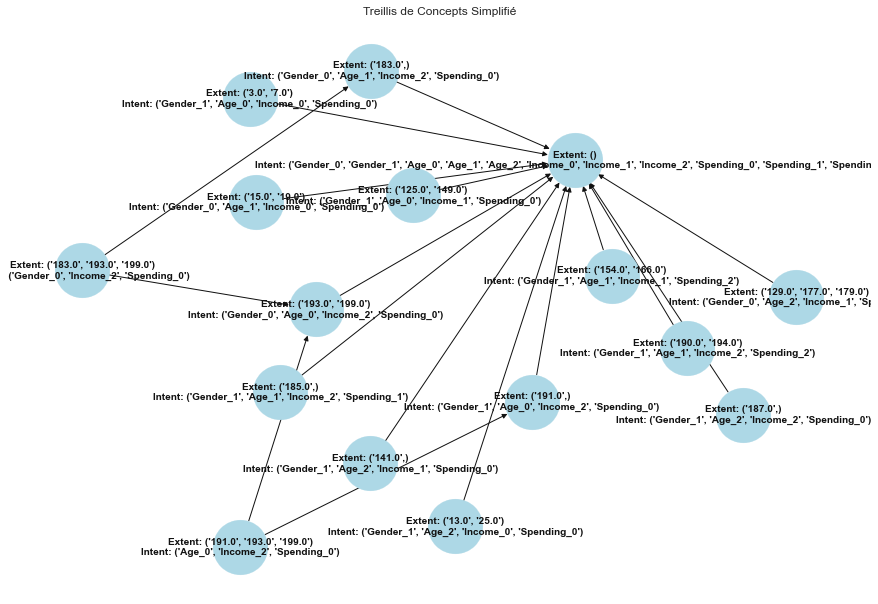

In [191]:
# Filtrer les concepts formels pour simplification (par exemple, niveau de profondeur ou nombre de nœuds)
filtered_concepts = [concept for concept in lattice if len(concept.extent) < 4]  # Filtrer pour des concepts ayant moins de 4 objets

# Création d'un graphe avec networkx
G = nx.DiGraph()

# Ajouter les nœuds et les arêtes
for concept in filtered_concepts:
    G.add_node(f"{concept.extent}", label=f"Extent: {concept.extent}\nIntent: {concept.intent}")
    for subconcept in concept.lower_neighbors:
        if subconcept in filtered_concepts:
            G.add_edge(f"{concept.extent}", f"{subconcept.extent}")

# Visualiser le treillis de concepts avec matplotlib
pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, 'label')

plt.figure(figsize=(12, 8))
nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('Treillis de Concepts Simplifié')
plt.show()


Filtrage des concepts : Les concepts formels sont filtrés pour ne garder que ceux ayant moins de 4 objets afin de simplifier la visualisation.
Création d'un graphe avec networkx : Un graphe dirigé est créé où chaque nœud représente un concept formel et chaque arête représente une relation entre concepts.
Ajout des nœuds et des arêtes : Les nœuds et les arêtes sont ajoutés au graphe en utilisant les concepts filtrés.
Visualisation : Le graphe est visualisé avec matplotlib en utilisant une disposition de ressort (spring_layout) pour espacer les nœuds de manière lisible.

# Comparaison entre clustering et AFC 

> Le clustering et l'Analyse Formelle des Concepts (AFC) sont deux techniques d'analyse de données utilisées pour identifier des structures et des relations dans des ensembles de données. Bien qu'ils partagent des objectifs similaires, ces deux méthodes sont fondamentalement différentes dans leur approche et leurs applications.

## Tableau de comparaison entre le clustering et l'AFC



<table border="10" cellpadding="100" cellspacing="100">
    <thead>
        <tr>
            <th>Aspect</th>
            <th>Clustering</th>
            <th>Analyse Formelle des Concepts (AFC)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Objectif</strong></td>
            <td>Grouper des objets similaires</td>
            <td>Identifier des concepts formels basés sur des relations</td>
        </tr>
        <tr>
            <td><strong>Données</strong></td>
            <td>Variables numériques ou catégorielles</td>
            <td>Table binaire (présence/absence d'attributs)</td>
        </tr>
        <tr>
            <td><strong>Sortie</strong></td>
            <td>Clusters d'objets</td>
            <td>Treillis de concepts formels</td>
        </tr>
        <tr>
            <td><strong>Méthodes</strong></td>
            <td>K-means, K-medoids, Hiérarchique, DBSCAN, etc.</td>
            <td>Théorie des treillis et des lattices</td>
        </tr>
        <tr>
            <td><strong>Applications</strong></td>
            <td>Segmentation, classification, détection de motifs</td>
            <td>Analyse des relations, classification hiérarchique</td>
        </tr>
        <tr>
            <td><strong>Visualisation</strong></td>
            <td>Diagrammes de dispersion, dendrogrammes, etc.</td>
            <td>Treillis de concepts formels</td>
        </tr>
        <tr>
            <td><strong>Avantages</strong></td>
            <td>Intuitif, nombreuses méthodes disponibles</td>
            <td>Hiérarchie claire, basée sur des relations définies</td>
        </tr>
        <tr>
            <td><strong>Inconvénients</strong></td>
            <td>Dépend des paramètres initiaux (nombre de clusters)</td>
            <td>Nécessite des données binaires, complexité computationnelle</td>
        </tr>
    </tbody>
</table>


# Conclusion

Le clustering et l'AFC sont deux techniques puissantes pour analyser des données, mais elles sont adaptées à des besoins différents. Le clustering est plus approprié pour grouper des objets similaires sans a priori sur les relations entre objets et attributs, tandis que l'AFC est utilisée pour explorer et comprendre les relations hiérarchiques entre des objets et des attributs dans un contexte formel.